In [1]:
import kagglehub

path = kagglehub.dataset_download("dhivyeshrk/diseases-and-symptoms-dataset")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/dhivyeshrk/diseases-and-symptoms-dataset/versions/1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/dhivyeshrk/diseases-and-symptoms-dataset/versions/1/Final_Augmented_dataset_Diseases_and_Symptoms.csv")

X = df.drop(columns=['diseases'])
y = df['diseases']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [6]:
y_one_hot = to_categorical(y_encoded)

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_one_hot, test_size=0.2, random_state=42)

In [7]:
model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
X = df.drop(columns=['diseases'])
y = df['diseases']

Epoch 1/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.6631 - loss: 1.6125 - val_accuracy: 0.8276 - val_loss: 0.5101
Epoch 2/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.8401 - loss: 0.4583 - val_accuracy: 0.8372 - val_loss: 0.4642
Epoch 3/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.8498 - loss: 0.4160 - val_accuracy: 0.8408 - val_loss: 0.4471
Epoch 4/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.8571 - loss: 0.3922 - val_accuracy: 0.8424 - val_loss: 0.4520
Epoch 5/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.8594 - loss: 0.3802 - val_accuracy: 0.8427 - val_loss: 0.4457
Epoch 6/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.8622 - loss: 0.3688 - val_accuracy: 0.8462 - val_loss: 0.4322
Epoch 7/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.8637 - loss: 0.3572 - val_accuracy: 0.8467 - val_loss: 0.4439
Epoch 8/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.8677 - loss: 0

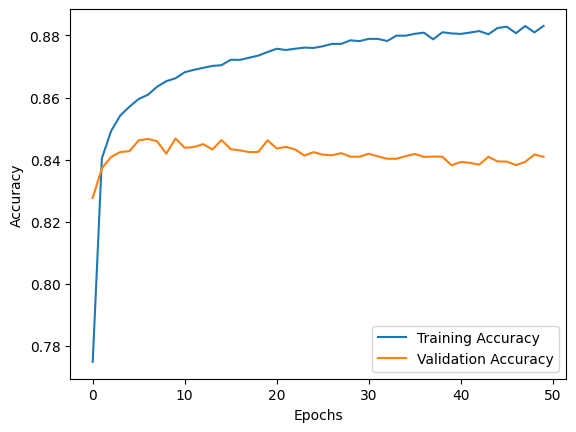

In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8422 - loss: 0.5514
Test Accuracy: 84.03%
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.92      0.90      0.91        81
           2       0.79      0.86      0.83        58
           3       1.00      1.00      1.00         6
           4       0.91      0.92      0.91        63
           5       0.83      0.83      0.83         6
           6       1.00      0.60      0.75         5
           7       0.68      0.85      0.76        20
           8       0.76      0.72      0.74       103
           9       0.84      0.78      0.81       179
          10       0.85      0.92      0.88       253
          11       0.85      0.64      0.73       221
          12       0.71      0.72      0.71       187
          13       0.50      1.00      0.67         3
          14       0.70 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
y_pred = model.predict(X_test)
print(y_pred[:5])

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
[[2.4795742e-07 1.0059190e-07 2.6717057e-08 ... 8.7001126e-07
  1.6079890e-05 2.5080540e-09]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.3852030e-31 0.0000000e+00]
 [6.6425638e-25 4.5491351e-21 1.0998342e-15 ... 2.4586888e-10
  1.5802831e-10 1.0851878e-18]
 [2.0293701e-30 5.1786200e-23 7.4203213e-31 ... 4.4725869e-22
  1.7261084e-12 6.2575461e-26]
 [1.3963481e-31 2.3500838e-33 0.0000000e+00 ... 4.8585460e-25
  5.9587853e-19 2.2429744e-37]]


In [13]:
y_pred = model.predict(X_test)
print(y_pred[:5])

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
[[2.4795742e-07 1.0059190e-07 2.6717057e-08 ... 8.7001126e-07
  1.6079890e-05 2.5080540e-09]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.3852030e-31 0.0000000e+00]
 [6.6425638e-25 4.5491351e-21 1.0998342e-15 ... 2.4586888e-10
  1.5802831e-10 1.0851878e-18]
 [2.0293701e-30 5.1786200e-23 7.4203213e-31 ... 4.4725869e-22
  1.7261084e-12 6.2575461e-26]
 [1.3963481e-31 2.3500838e-33 0.0000000e+00 ... 4.8585460e-25
  5.9587853e-19 2.2429744e-37]]


In [14]:
model.save('disease_prediction_nn_model.h5')